In [4]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import datetime as dt
import json
from libs.prep_methods import *
from libs.drew_lib import *
load_dotenv()
from sec_edgar_downloader import Downloader

In [2]:
#dl = Downloader("../Notebooks/Data/Raw_Data")

In [3]:
dl.get("10-Q", "NFLX", after="2012-06-01")
dl.get("10-Q", "FB", after="2012-06-01")
dl.get("10-Q", "UBER", after="2012-06-01")
dl.get("10-Q", "MCHP", after="2012-06-01")
dl.get("10-Q", "ABNB", after="2012-06-01")
dl.get("10-Q", "FANG", after="2012-06-01")
dl.get("10-Q", "MRO", after="2012-06-01")
dl.get("10-Q", "DVN", after="2012-06-01")
dl.get("10-Q", "SPWR", after="2012-06-01")
dl.get("10-Q", "REGI", after="2012-06-01")
dl.get("10-Q", "MTRX", after="2012-06-01")
dl.get("10-Q", "BLK", after="2012-06-01")
dl.get("10-Q", "PYPL", after="2012-06-01")
dl.get("10-Q", "MELI", after="2012-06-01")
dl.get("10-Q", "JPM", after="2012-06-01")

30

In [37]:
import os
import pandas as pd
data = []


In [16]:
data = []
for folder in sorted(os.listdir('../Notebooks/Data/Raw_Data/sec-edgar-filings')):
    try:
        for type in sorted(os.listdir('../Notebooks/Data/Raw_Data/sec-edgar-filings/'+folder)):
            data.append((folder, type))
    except:
        pass

df = pd.DataFrame(data, columns=['Folder', 'File'])
print (df)

   Folder       File
0    ABNB  .DS_Store
1    ABNB       10-Q
2     BLK       10-Q
3     DVN       10-Q
4    FANG       10-Q
5      FB       10-Q
6     JPM       10-Q
7    MCHP       10-Q
8    MELI       10-Q
9     MRO       10-Q
10   MTRX       10-Q
11   NFLX       10-Q
12   PYPL       10-Q
13   REGI       10-Q
14   SPWR       10-Q
15   UBER       10-Q


In [10]:
# Get folder list
company_list = list(df['Folder'])
print(company_list)

['ABNB', 'ABNB', 'BLK', 'DVN', 'FANG', 'FB', 'JPM', 'MCHP', 'MELI', 'MRO', 'MTRX', 'NFLX', 'PYPL', 'REGI', 'SPWR', 'UBER']


In [12]:
company_list.pop(0)
print(company_list)

['ABNB', 'BLK', 'DVN', 'FANG', 'FB', 'JPM', 'MCHP', 'MELI', 'MRO', 'MTRX', 'NFLX', 'PYPL', 'REGI', 'SPWR', 'UBER']


In [21]:
data = []

ticker_folder = ['ABNB', 'BLK', 'DVN', 'FANG', 'FB', 'JPM', 'MCHP', 'MELI', 'MRO', 'MTRX', 'NFLX', 'PYPL', 'REGI', 'SPWR', 'UBER']
for ticker in ticker_folder:
    for folder in sorted(os.listdir(f'../Notebooks/Data/Raw_Data/sec-edgar-filings/{ticker}/10-Q')):
        try:
            for accession_no in sorted(os.listdir((f'../Notebooks/Data/Raw_Data/sec-edgar-filings/{ticker}/10-Q')+folder)):
                data.append((ticker, accession_no))
        except:
            pass

df = pd.DataFrame(data, columns=['Ticker', 'Accession No'])
print (df)

Empty DataFrame
Columns: [Ticker, Accession No]
Index: []


In [24]:
ticker_folder = ['ABNB', 'BLK', 'DVN', 'FANG', 'FB', 'JPM', 'MCHP', 'MELI', 'MRO', 'MTRX', 'NFLX', 'PYPL', 'REGI', 'SPWR', 'UBER']
for ticker in ticker_folder:
    print(sorted(os.listdir(f'../Notebooks/Data/Raw_Data/sec-edgar-filings/{ticker}/10-Q')))

['.DS_Store', '0001559720-21-000017', '0001559720-22-000009', '0001628280-21-010389', '0001628280-21-016979']
['0001193125-12-343728', '0001193125-12-460708', '0001193125-13-210506', '0001193125-13-326890', '0001193125-13-434891', '0001193125-14-192207', '0001193125-14-302181', '0001193125-14-403120', '0001193125-15-179094', '0001193125-15-283171', '0001564590-15-009883', '0001564590-16-018688', '0001564590-16-023209', '0001564590-16-028171', '0001564590-17-009686', '0001564590-17-016394', '0001564590-17-022570', '0001564590-18-012320', '0001564590-18-020313', '0001564590-18-028881', '0001564590-19-017793', '0001564590-19-030654', '0001564590-19-042157', '0001564590-20-023352', '0001564590-20-038433', '0001564590-20-051202', '0001564590-21-024726', '0001564590-21-041406', '0001564590-21-054838', '0001564590-22-018505']
['0000950170-22-007007', '0001193125-12-329113', '0001193125-13-323925', '0001193125-14-192498', '0001193125-14-298369', '0001193125-14-397861', '0001193125-15-174003', 

In [7]:
os.listdir('../Notebooks/Data/Raw_Data/sec-edgar-filings')
Notebooks/Data/Raw_Data/sec-edgar-filings/ABNB/10-Q/0001559720-21-000017

['MTRX',
 'UBER',
 '.DS_Store',
 'BLK',
 'MCHP',
 'REGI',
 'MELI',
 'FB',
 'NFLX',
 'PYPL',
 'FANG',
 'MRO',
 'SPWR',
 'ABNB',
 'JPM',
 'DVN']

# Troubleshoot SEC text df

In [41]:
sec_text = pd.read_csv("../Notebooks/Data/Cleaned_Data/sec_all_data.csv")

In [42]:
sec_text

,Unnamed: 0,ticker,periodOfReport,linkToFilingDetails,formType,cik,Business,Risk Factors,Management’s Discussion and Analysis of Financial Condition and Results of Operations
0,0,NFLX,2022-03-31,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
1,1,NFLX,2021-09-30,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
2,2,NFLX,2021-06-30,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
3,3,NFLX,2021-03-31,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
4,4,NFLX,2020-09-30,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
...,...,...,...,...,...,...,...,...,...
493,510,MELI,2013-12-31,https://www.sec.gov/Archives/edgar/data/109959...,10-K,1099590,"ITEM 1. BUSINESS MercadoLibre, Inc. (together...",ITEM 1A. RISK FACTORS For purposes of this se...,ITEM 7. MANAGEMENT&#146;S DISCUSSION AND ANAL...
494,511,MELI,2012-12-31,https://www.sec.gov/Archives/edgar/data/109959...,10-K,1099590,"ITEM 1. BUSINESS MercadoLibre, Inc. (together...",ITEM 1A. RISK FACTORS For purposes of this se...,ITEM 7. MANAGEMENT&#146;S DISCUSSION AND ANAL...
495,513,SOFI,2021-12-31,https://www.sec.gov/Archives/edgar/data/181887...,10-K,1818874,Item 1. Business Company Overview We are a me...,Item 1A. Risk Factors In evaluating our compa...,Item 7. MANAGEMENT&#8217;S DISCUSSION AND ANA...
496,514,SOFI,2020-12-31,https://www.sec.gov/Archives/edgar/data/181887...,10-K/A,1818874,Item 1. Business. &#160; Overview &#160; We a...,Item 1.A. Risk Factors. &#160;An investment i...,Item 7. Management&#8217;s Discussion and Ana...


In [21]:
sec_text = sec_text.drop(columns="Unnamed: 0")

In [23]:
sec_text.at[0, "linkToFilingDetails"]

'https://www.sec.gov/Archives/edgar/data/1065280/000106528022000145/nflx-20220331.htm'

In [26]:
sec_text_10q = sec_text[sec_text['formType']=="10-Q"]

In [43]:
sec_text_10q

,ticker,periodOfReport,linkToFilingDetails,formType,cik,Business,Risk Factors,Management’s Discussion and Analysis of Financial Condition and Results of Operations
0,NFLX,2022-03-31,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
1,NFLX,2021-09-30,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
2,NFLX,2021-06-30,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
3,NFLX,2021-03-31,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
4,NFLX,2020-09-30,https://www.sec.gov/Archives/edgar/data/106528...,10-Q,1065280,NaN,undefined,Item 2. \n\nManagement&#8217;s Discussion and...
...,...,...,...,...,...,...,...,...
371,SOFI,2022-03-31,https://www.sec.gov/Archives/edgar/data/181887...,10-Q,1818874,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
372,SOFI,2021-09-30,https://www.sec.gov/Archives/edgar/data/181887...,10-Q,1818874,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
373,SOFI,2021-06-30,https://www.sec.gov/Archives/edgar/data/181887...,10-Q,1818874,NaN,undefined,Item 2. Management&#8217;s Discussion and Ana...
374,SOFI,2021-03-31,https://www.sec.gov/Archives/edgar/data/181887...,10-Q,1818874,NaN,undefined,ITEM 2. MANAGEMENT&#8217;S DISCUSSION AND ANA...


In [31]:
sec_text_10q.at[0, "linkToFilingDetails"]

'https://www.sec.gov/Archives/edgar/data/1065280/000106528022000145/nflx-20220331.htm'

In [29]:
sec_text_10q.tail(40)

,ticker,periodOfReport,linkToFilingDetails,formType,cik,Business,Risk Factors,Management’s Discussion and Analysis of Financial Condition and Results of Operations
335,PYPL,NaN,https://www.sec.gov/Archives/edgar/data/163391...,10-Q,1633917,NaN,undefined,Item 2: Management's Discussion and Analysis ...
336,PYPL,NaN,https://www.sec.gov/Archives/edgar/data/163391...,10-Q,1633917,NaN,undefined,Item 2: Management's Discussion and Analysis ...
337,PYPL,NaN,https://www.sec.gov/Archives/edgar/data/163391...,10-Q,1633917,NaN,undefined,Item 2: Management's Discussion and Analysis ...
338,PYPL,NaN,https://www.sec.gov/Archives/edgar/data/163391...,10-Q,1633917,NaN,undefined,Item 2: Management's Discussion and Analysis ...
339,PYPL,NaN,https://www.sec.gov/Archives/edgar/data/163391...,10-Q,1633917,NaN,undefined,Item 2: Management's Discussion and Analysis ...
340,MELI,2022-03-31,https://www.sec.gov/Archives/edgar/data/109959...,10-Q,1099590,NaN,undefined,NaN
341,MELI,2021-09-30,https://www.sec.gov/Archives/edgar/data/109959...,10-Q,1099590,NaN,undefined,NaN
342,MELI,2021-06-30,https://www.sec.gov/Archives/edgar/data/109959...,10-Q,1099590,NaN,undefined,NaN
343,MELI,2021-03-31,https://www.sec.gov/Archives/edgar/data/109959...,10-Q,1099590,NaN,undefined,NaN
344,MELI,2020-09-30,https://www.sec.gov/Archives/edgar/data/109959...,10-Q,1099590,NaN,undefined,NaN


In [45]:
from sec_api import QueryApi
queryApi = QueryApi(api_key="43d18e4ffedde4ca940e46ce210780daa0b7de17674abb369b5a8ef9fb3b69a1")
from sec_api import ExtractorApi
sec_api = os.getenv("sec_api_key")
extractorApi = ExtractorApi("43d18e4ffedde4ca940e46ce210780daa0b7de17674abb369b5a8ef9fb3b69a1")

In [54]:
url = sec_text_10q["linkToFilingDetails"].loc[0]
filingtype = sec_text_10q['formType'].loc[0]
data={}
if (filingtype == "10-Q"):
        data['Business']=pd.NA
        data['Risk Factors']=extractorApi.get_section(url, "part2item1A", "text")
        data['Management’s Discussion and Analysis of Financial Condition and Results of Operations']=extractorApi.get_section(url, "part1item2", "text")
else:
        data['Business']=extractorApi.get_section(url, "1", "text")
        data['Risk Factors']=extractorApi.get_section(url, "1A", "text")
        data['Management’s Discussion and Analysis of Financial Condition and Results of Operations']=extractorApi.get_section(url, "7", "text")
pd.DataFrame(data)
data

TypeError: list indices must be integers or slices, not str

### Attempting to pull more news data

In [57]:
import requests

url = "https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/search/NewsSearchAPI"

querystring = {"q":"AirBNB","pageNumber":"1","pageSize":"10","autoCorrect":"true","fromPublishedDate":"null","toPublishedDate":"null"}

headers = {
	"X-RapidAPI-Key": "3813daf763msh5f053a8f3b34d68p104fccjsnd34328662702",
	"X-RapidAPI-Host": "contextualwebsearch-websearch-v1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"_type":"news","didUMean":"","totalCount":781,"relatedSearch":[],"value":[{"id":"586457495642698189","title":"Mystery Machine Airbnb: Matthew Lillard to host Scooby-Doo inspired rental","url":"https://fox5sandiego.com/entertainment/airbnb-to-rent-out-scooby-doos-iconic-mystery-machine/","description":"The van rental will offer guests the chance to spend a night filled with Scooby-Doo nostalgia off the Malibu coast.","body":"Jun 8, 2022 / 03:53 PM PDT\nUpdated:\nJun 8, 2022 / 03:57 PM PDT\nSHARE\nMALIBU  Zoinks!\nThis summer, Airbnb is partnering with Warner Bros. to celebrate the 20-year anniversary of the live-action Scooby-Doo film by offering fans a chance to stay in the iconic Mystery Machine van.\nThe van rental, hosted by Matthew Lillard who played Shaggy in the film, will offer guests the chance to spend a night filled with Scooby-Doo nostalgia off the Malibu coast, according to Airbnb.\nIve been channeling Shaggy since the live-action adaptation in 2002, and hes been a part of

In [69]:
dict = (response.text)

In [70]:
articles = dict.get('value')

AttributeError: 'str' object has no attribute 'get'

In [68]:
pd.DataFrame(newjson)

ValueError: DataFrame constructor not properly called!

In [62]:
import requests
news_url = "https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/search/NewsSearchAPI"
news_headers = {
	"X-RapidAPI-Key": "3813daf763msh5f053a8f3b34d68p104fccjsnd34328662702",
	"X-RapidAPI-Host": "contextualwebsearch-websearch-v1.p.rapidapi.com"
}

In [61]:
def get_news(keywords):
        querystring = {"q":keywords,"pageNumber":"1","pageSize":"10","autoCorrect":"true","fromPublishedDate":"null","toPublishedDate":"null"}
        response = requests.request("GET", news_url, headers=news_headers, params=querystring)
        return response.text

In [ ]:
def form_df(keywords):
    news = get_news(keywords)

    articles = []
    for article in news:
        try:
            title = article['title']
            text = article['content']
            date = article['publishedAt'][:10]

            articles.append({
                'title' : title,
                'text' : text,
                'date' : date,
                'language' : 'en'
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)

In [71]:
import requests

url = "https://guardianmikilior1v1.p.rapidapi.com/getTags"

payload = "apiKey=%3CREQUIRED%3E&query=%22AirBNB%22"
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"X-RapidAPI-Key": "3813daf763msh5f053a8f3b34d68p104fccjsnd34328662702",
	"X-RapidAPI-Host": "Guardianmikilior1V1.p.rapidapi.com"
}

response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

{"messages":"The API is unreachable, please contact the API provider", "info": "Your Client (working) ---> Gateway (working) ---> API (not working)"}


## Creating Data pipeline

In [5]:
uber_with_sec = pd.read_csv(f'./Data/Cleaned_Data/UBER_WITH_SEC.csv', parse_dates = True, infer_datetime_format = True)
uber_with_sec['Unnamed: 0'] = pd.to_datetime(uber_with_sec['Unnamed: 0'], infer_datetime_format = True, errors = 'coerce', format = '%Y/%m/%d')
uber_with_sec = uber_with_sec.set_index('Unnamed: 0')
uber_with_sec.index.name = None

In [6]:
uber_with_sec

,revenue,cost_without_depletion_and_amortization,operations_and_support_expense,selling_and_market_expense,research_and_development_expense,general_and_administrative_expense,depreciation_depletion_and_amortization,costs_and_expenses,operating_income_loss,interest_expense,...,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
2019-05-10,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.060230,0.085886,0.841045,0.073045,189836990.0,41.57
2019-05-11,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,-0.114408,0.024583,0.885333,0.090000,189836990.0,41.57
2019-05-12,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.069736,0.098000,0.844818,0.057091,189836990.0,41.57
2019-05-13,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,79478203.0,37.10
2019-05-14,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,46661187.0,39.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.309800,0.051000,0.859000,0.090000,29620958.0,23.67
2022-05-28,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.294400,0.131000,0.803000,0.066000,29620958.0,23.67
2022-05-29,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,29620958.0,23.67
2022-05-31,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,33048952.0,23.20


In [7]:
airbnb_financial_metrics = pd.read_csv(f'./Data/Cleaned_Data/SEC_Fin_Data_and_STOCKS/ABNB.csv', parse_dates = True, infer_datetime_format = True)

In [8]:
airbnb_financial_metrics

,date,RevenueFromContractWithCustomerExcludingAssessedTax,CostOfRevenue,OperationsAndSupportExpense,ResearchAndDevelopmentExpense,SellingAndMarketingExpense,GeneralAndAdministrativeExpense,RestructuringCharges,CostsAndExpenses,OperatingIncomeLoss,...,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeTaxExpenseBenefit,NetIncomeLoss,IncomeLossFromContinuingOperationsPerBasicShare,IncomeLossFromContinuingOperationsPerDilutedShare,WeightedAverageNumberOfSharesOutstandingBasic,WeightedAverageNumberOfDilutedSharesOutstanding,ticker,close,volume
0,2020-12-10,1.342331e+09,227325000.0,166106000.0,213920000.0,113494000.0,180021000.0,22728000.0,9.235940e+08,418737000.0,...,307052000.0,87724000.0,219328000.0,0.00,0.00,265137000.0,299206000.0,ABNB,144.71,70470750.0
1,2020-12-11,1.342331e+09,227325000.0,166106000.0,213920000.0,113494000.0,180021000.0,22728000.0,9.235940e+08,418737000.0,...,307052000.0,87724000.0,219328000.0,0.00,0.00,265137000.0,299206000.0,ABNB,139.25,26981241.0
2,2020-12-14,1.342331e+09,227325000.0,166106000.0,213920000.0,113494000.0,180021000.0,22728000.0,9.235940e+08,418737000.0,...,307052000.0,87724000.0,219328000.0,0.00,0.00,265137000.0,299206000.0,ABNB,130.00,16966090.0
3,2020-12-15,1.342331e+09,227325000.0,166106000.0,213920000.0,113494000.0,180021000.0,22728000.0,9.235940e+08,418737000.0,...,307052000.0,87724000.0,219328000.0,0.00,0.00,265137000.0,299206000.0,ABNB,124.80,10914466.0
4,2020-12-16,1.342331e+09,227325000.0,166106000.0,213920000.0,113494000.0,180021000.0,22728000.0,9.235940e+08,418737000.0,...,307052000.0,87724000.0,219328000.0,0.00,0.00,265137000.0,299206000.0,ABNB,137.99,20410248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2022-05-25,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,...,-8086000.0,10706000.0,-18792000.0,-0.03,-0.03,635314000.0,635314000.0,ABNB,110.40,6170197.0
367,2022-05-26,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,...,-8086000.0,10706000.0,-18792000.0,-0.03,-0.03,635314000.0,635314000.0,ABNB,114.30,6884206.0
368,2022-05-27,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,...,-8086000.0,10706000.0,-18792000.0,-0.03,-0.03,635314000.0,635314000.0,ABNB,120.50,7375113.0
369,2022-05-31,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,...,-8086000.0,10706000.0,-18792000.0,-0.03,-0.03,635314000.0,635314000.0,ABNB,120.87,9089352.0


# Data pipeline SEC

In [23]:
from sec_api import ExtractorApi
from sec_api import QueryApi
sec_api = os.getenv("sec_api_key")
queryApi = QueryApi(api_key="43d18e4ffedde4ca940e46ce210780daa0b7de17674abb369b5a8ef9fb3b69a1")
extractorApi = ExtractorApi(api_key="43d18e4ffedde4ca940e46ce210780daa0b7de17674abb369b5a8ef9fb3b69a1")

## Step 1: Ticker List

In [16]:
# Add a Ticker List
ticker_list = pd.read_csv("./Data/Cleaned_Data/Ticker_library.csv")["Ticker"].to_list()

## Step 2: Get URLs for 10-k and 10-q SEC Filings in Dataframe

In [24]:
# Function to query the SEC Edgar database for URL information using SEC API (note: limited to 100 filings)
# Returns a dataframe based on filing type (10-q, 10-k, etc.)
def SEC_query(ticker_list,filingType):
    file_url_dict = {}
    for ticker in ticker_list:
        query = {
            "query": { "query_string": { 
                "query": f"ticker:{ticker} AND filedAt:"+"{2012-06-01 TO 2022-06-01} AND formType:\""+f"{filingType}\"" 
            } },
            "from": "0",
            "size": "100",
            "sort": [{ "filedAt": { "order": "desc" } }]
        }
        filings = queryApi.get_filings(query)
        file_url_dict[ticker] = pd.json_normalize(filings, record_path =['filings'])
    url_data = {
        "ticker":[],
        "periodOfReport":[],
        "linkToFilingDetails":[],
        "formType":[],
        "cik":[]
        }
    for ticker in ticker_list:
        url_data["ticker"].extend(file_url_dict[ticker]["ticker"].to_list())
        url_data["periodOfReport"].extend(file_url_dict[ticker]["periodOfReport"].to_list())
        url_data["linkToFilingDetails"].extend(file_url_dict[ticker]["linkToFilingDetails"].to_list())
        url_data["formType"].extend(file_url_dict[ticker]["formType"].to_list())
        url_data["cik"].extend(file_url_dict[ticker]["cik"].to_list())
    return pd.DataFrame(url_data)

In [25]:
# Run SEC Query function to obtain dictionaries of 10-k and 10-q filings
url_10q_df = SEC_query(ticker_list,"10-Q")
url_10k_df = SEC_query(ticker_list,"10-K")

## Pull text Risk Factors, Management Analysis, and Business sections from 10-q and 10-k filings and add to one dataframe

In [33]:
# Create 10-Q text pull function: 
# pulls Risk Factors and Management Analysis from 10-q filings; 
# fill Business section as n/a because 10-q doesn't include this section.

def sec_text_pull_10q(url):
    url = str(url)
    data = {}
    data['Business']=pd.NA
    data['Risk Factors']=extractorApi.get_section(url, "part2item1A", "text")
    data['Management Analysis']=extractorApi.get_section(url, "part1item2", "text")
    return data

In [27]:
# Create 10-K text pull function: 
# pulls Business, Risk Factors and Management Analysis from 10-k filings.
def sec_text_pull_10k(url):
    url = str(url)
    data = {}
    data['Business']=extractorApi.get_section(url, "1", "text")
    data['Risk Factors']=extractorApi.get_section(url, "1A", "text")
    data['Management Analysis']=extractorApi.get_section(url, "7", "text")
    return data

In [ ]:

def pull_sec_from_df(df:pd.DataFrame, df_10q_url:pd.DataFrame):
    data = {
        "Business":[],
        "Risk Factors":[],
        'Management Analysis':[]
    }

    for rowNumber in range(len(df_10k_url.index)):
        pull = sec_text_pull_10k(df_10k_url['linkToFilingDetails'].loc[rowNumber],df_10k_url['formType'].loc[rowNumber])
        data['Business'].append(pull['Business'])
        data['Risk Factors'].append(pull['Risk Factors'])
        data['Management Analysis'].append(
            pull['Management Analysis'])

    for rowNumber in range(len(df_10q_url.index)):
        pull = sec_text_pull_10k(df_10q_url['linkToFilingDetails'].loc[rowNumber],df_10q_url['formType'].loc[rowNumber])
        data['Business'].append(pull['Business'])
        data['Risk Factors'].append(pull['Risk Factors'])
        data['Management Analysis'].append(
            pull['Management Analysis'])
    return pd.DataFrame(data)

In [50]:
def pull_10k_text_to_df(ticker_list,filingType):

    file_url_dict = {}
    for ticker in ticker_list:
        query = {
            "query": { "query_string": { 
                "query": f"ticker:{ticker} AND filedAt:"+"{2012-06-01 TO 2022-06-01} AND formType:\""+f"{filingType}\"" 
            } },
            "from": "0",
            "size": "100",
            "sort": [{ "filedAt": { "order": "desc" } }]
        }
        filings = queryApi.get_filings(query)
        file_url_dict[ticker] = pd.json_normalize(filings, record_path =['filings'])
    url_data = {
        "ticker":[],
        "periodOfReport":[],
        "linkToFilingDetails":[],
        "formType":[],
        "cik":[]
        }
    for ticker in ticker_list:
        url_data["ticker"].extend(file_url_dict[ticker]["ticker"].to_list())
        url_data["periodOfReport"].extend(file_url_dict[ticker]["periodOfReport"].to_list())
        url_data["linkToFilingDetails"].extend(file_url_dict[ticker]["linkToFilingDetails"].to_list())
        url_data["formType"].extend(file_url_dict[ticker]["formType"].to_list())
        url_data["cik"].extend(file_url_dict[ticker]["cik"].to_list())

    url_df = pd.DataFrame(url_data)

    data = {
        "Business":[],
        "Risk Factors":[],
        'Management Analysis':[]
    }

    for rowNumber in range(len(url_df.index)):
        data["ticker"] = url_data["ticker"] 
        data["periodOfReport"]=url_data["periodOfReport"]
        data["linkToFilingDetails"]=url_data["linkToFilingDetails"]
        data["formType"]=url_data["formType"]
        data["cik"]=url_data["cik"]
        pull = sec_text_pull_10k(url_df['linkToFilingDetails'].loc[rowNumber])
        data['Business'].append(pull['Business'])
        data['Risk Factors'].append(pull['Risk Factors'])
        data['Management Analysis'].append(
            pull['Management Analysis'])

    return pd.DataFrame(data)

In [51]:
df_10k = pull_10k_text_to_df(ticker_list,"10-K")

In [ ]:
def pull_10k_from_df(df:pd.DataFrame):
    data = {
        "Business":[],
        "Risk Factors":[],
        'Management Analysis':[]
    }

    for rowNumber in range(len(df.index)):
        pull = sec_text_pull_10k(df['linkToFilingDetails'].loc[rowNumber])
        data['Business'].append(pull['Business'])
        data['Risk Factors'].append(pull['Risk Factors'])
        data['Management Analysis'].append(
            pull['Management Analysis'])

    return pd.DataFrame(data)

In [36]:
def pull_10q_from_df(df:pd.DataFrame):
    data = {
        "Business":[],
        "Risk Factors":[],
        'Management Analysis':[]
    }

    for rowNumber in range(len(df.index)):
        pull = sec_text_pull_10q(df['linkToFilingDetails'].loc[rowNumber])
        data['Business'].append(pull['Business'])
        data['Risk Factors'].append(pull['Risk Factors'])
        data['Management Analysis'].append(
            pull['Management Analysis'])

    return pd.DataFrame(data)

In [42]:
# Function to run Query for 10-k (annual reports) and 10-q (quarterly reports) filing information
def create_sec_text_df(ticker_list):
    # Get URL dataframes via SEC Query
    url_10k_df = SEC_query(ticker_list,'10-K')
    url_10q_df = SEC_query(ticker_list,'10-Q')
    # Pull 10-k and 10-q text sections separately via sec_text_pull using extractor api
    # and concatenate with URL dataframe
    text_10k_df = pd.concat([url_10k_df,pull_10k_from_df(url_10k_df)])
    text_10q_df = pd.concat([url_10q_df,pull_10q_from_df(url_10q_df)])
    # Return combined 10-q and 10-k dataframe
    return pd.concat([text_10k_df, text_10q_df])

In [46]:
df_10k = pd.concat([url_10k_df,pull_10k_from_df(url_10k_df)])

In [47]:
df_10k

,ticker,periodOfReport,linkToFilingDetails,formType,cik,Business,Risk Factors,Management Analysis
0,NFLX,2021-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K,1065280,NaN,NaN,NaN
1,NFLX,2020-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K,1065280,NaN,NaN,NaN
2,NFLX,2019-12-31,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,10-K,1065280,NaN,NaN,NaN
3,NFLX,2018-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K/A,1065280,NaN,NaN,NaN
4,NFLX,2018-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K,1065280,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
134,NaN,NaN,NaN,NaN,NaN,"ITEM 1. BUSINESS MercadoLibre, Inc. (together...",ITEM 1A. RISK FACTORS For purposes of this se...,ITEM 7. MANAGEMENT&#146;S DISCUSSION AND ANAL...
135,NaN,NaN,NaN,NaN,NaN,undefined,undefined,undefined
136,NaN,NaN,NaN,NaN,NaN,Item 1. Business \n\nCompany Overview \n\nWe ...,Item 1A. Risk Factors \n\nIn evaluating our c...,Item 7. MANAGEMENT&#8217;S DISCUSSION AND ANA...
137,NaN,NaN,NaN,NaN,NaN,Item 1. Business. \n\n&#160; \n\nOverview \n\...,Item 1.A. Risk Factors. \n\n&#160;\n\nAn inve...,Item 7. Management&#8217;s Discussion and Ana...


In [40]:
all_sec_text_df = create_sec_text_df(ticker_list)

In [41]:
all_sec_text_df

,ticker,periodOfReport,linkToFilingDetails,formType,cik,Business,Risk Factors,Management Analysis
0,NFLX,2021-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K,1065280,NaN,NaN,NaN
1,NFLX,2020-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K,1065280,NaN,NaN,NaN
2,NFLX,2019-12-31,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,10-K,1065280,NaN,NaN,NaN
3,NFLX,2018-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K/A,1065280,NaN,NaN,NaN
4,NFLX,2018-12-31,https://www.sec.gov/Archives/edgar/data/106528...,10-K,1065280,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
372,NaN,NaN,NaN,NaN,NaN,<NA>,Item 1A. Risk Factors \n\nIn evaluating our c...,Item 2. Management&#8217;s Discussion and Ana...
373,NaN,NaN,NaN,NaN,NaN,<NA>,Item 1A. Risk Factors \n\nIn evaluating our c...,Item 2. Management&#8217;s Discussion and Ana...
374,NaN,NaN,NaN,NaN,NaN,<NA>,ITEM 1A. RISK FACTORS. \n\n&#160;\n\nFactors ...,ITEM 2. MANAGEMENT&#8217;S DISCUSSION AND ANA...
375,NaN,NaN,NaN,NaN,NaN,<NA>,,


In [ ]:
def remove_specials(df:pd.DataFrame):
    df = df.replace(r'\r+|\n+|\t+','', regex=True)
sec_text_df["Business"].replace(r'\r+|\n+|\t+','', regex=True,inplace=True)
sec_text_df["Risk Factors"].replace(r'\r+|\n+|\t+','', regex=True,inplace=True)
sec_text_df["Management Analysis"].replace(r'\r+|\n+|\t+','', regex=True,inplace=True)
sec_text_df.head()

## Attempt to get the neural net working

In [52]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline


Bad key savefig.frameon in file /Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  #

In [54]:
uber_with_sec = pd.read_csv(f'./Data/Cleaned_Data/UBER_WITH_SEC.csv', parse_dates = True, infer_datetime_format = True)
uber_with_sec['Unnamed: 0'] = pd.to_datetime(uber_with_sec['Unnamed: 0'], infer_datetime_format = True, errors = 'coerce', format = '%Y/%m/%d')
uber_with_sec = uber_with_sec.set_index('Unnamed: 0')
uber_with_sec.index.name = None

In [55]:
uber_with_sec

,revenue,cost_without_depletion_and_amortization,operations_and_support_expense,selling_and_market_expense,research_and_development_expense,general_and_administrative_expense,depreciation_depletion_and_amortization,costs_and_expenses,operating_income_loss,interest_expense,...,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
2019-05-10,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.060230,0.085886,0.841045,0.073045,189836990.0,41.57
2019-05-11,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,-0.114408,0.024583,0.885333,0.090000,189836990.0,41.57
2019-05-12,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.069736,0.098000,0.844818,0.057091,189836990.0,41.57
2019-05-13,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,79478203.0,37.10
2019-05-14,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,46661187.0,39.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.309800,0.051000,0.859000,0.090000,29620958.0,23.67
2022-05-28,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.294400,0.131000,0.803000,0.066000,29620958.0,23.67
2022-05-29,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,29620958.0,23.67
2022-05-31,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,129000000.0,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,33048952.0,23.20


In [57]:
# Create the features (X) and target (y) sets
X = uber_with_sec.iloc[:, 0:20].values
y = uber_with_sec["close"].values

In [58]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [61]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [60]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200


ValueError: in user code:

    File "/Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/laurenkrohn/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 11), found shape=(None, 20)


In [63]:
from lightgbm import LGBMClassifier, LGBMRegressor

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
def train_time_series_with_folds(df, horizon=24*7):
    X = df.drop(['close', 'volume'], axis=1)
    y = df['close']
    
    #take last week of the dataset for validation
    X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    
    #create, train and do inference of the model
    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    #calculate MAE
    mae = np.round(mean_absolute_error(y_test, predictions), 3)    
    
    #plot reality vs prediction for the last week of the dataset
    fig = plt.figure(figsize=(16,8))
    plt.title(f'Real vs Prediction - MAE {mae}', fontsize=20)
    plt.plot(y_test, color='red')
    plt.plot(pd.Series(predictions, index=y_test.index), color='green')
    plt.xlabel('Hour', fontsize=16)
    plt.ylabel('Number of Shared Bikes', fontsize=16)
    plt.legend(labels=['Real', 'Prediction'], fontsize=16)
    plt.grid()
    plt.show()
    
    #create a dataframe with the variable importances of the model
    df_importances = pd.DataFrame({
        'feature': model.feature_name_,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    #plot variable importances of the model
    plt.title('Variable Importances', fontsize=16)
    sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
    plt.show()

### Attempting Relatedly Code

In [64]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns # Visualization
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [66]:
uber_with_sec.head()

,revenue,cost_without_depletion_and_amortization,operations_and_support_expense,selling_and_market_expense,research_and_development_expense,general_and_administrative_expense,depreciation_depletion_and_amortization,costs_and_expenses,operating_income_loss,interest_expense,...,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
2019-05-10,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.060230,0.085886,0.841045,0.073045,189836990.0,41.57
2019-05-11,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,-0.114408,0.024583,0.885333,0.090000,189836990.0,41.57
2019-05-12,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.069736,0.098000,0.844818,0.057091,189836990.0,41.57
2019-05-13,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,79478203.0,37.10
2019-05-14,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,46661187.0,39.96


In [69]:
print(uber_with_sec.columns)

Index(['revenue', 'cost_without_depletion_and_amortization',
       'operations_and_support_expense', 'selling_and_market_expense',
       'research_and_development_expense',
       'general_and_administrative_expense',
       'depreciation_depletion_and_amortization', 'costs_and_expenses',
       'operating_income_loss', 'interest_expense',
       'nonoperating_income_expense',
       'incomeloss_from_continuining_operations', 'income_tax_expense_benefit',
       'income_loss_from_equity_method_investments', 'profit_loss', 'unnamed',
       'net_income_loss', 'earnings_per_share_basic',
       'earnings_per_share_diluted',
       'weighted_average_number_of_shares_outstanding_basic',
       'weight_average_number_of_diluted_shares_outstanding',
       'net_income_loss_attributable_to_redeemable_noncontrolling_interest',
       'sec_compound_sentiment', 'sec_positive_sentiment',
       'sec_neutral sentiment', 'sec_negative_sentiment',
       'stockmarket_compound_sentiment', 'stockmar

In [132]:
uber_df = uber_with_sec.reset_index().rename({'index': 'date'}, axis=1)
uber_df

,date,revenue,cost_without_depletion_and_amortization,operations_and_support_expense,selling_and_market_expense,research_and_development_expense,general_and_administrative_expense,depreciation_depletion_and_amortization,costs_and_expenses,operating_income_loss,...,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
0,2019-05-10,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.060230,0.085886,0.841045,0.073045,189836990.0,41.57
1,2019-05-11,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,-0.114408,0.024583,0.885333,0.090000,189836990.0,41.57
2,2019-05-12,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.069736,0.098000,0.844818,0.057091,189836990.0,41.57
3,2019-05-13,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,79478203.0,37.10
4,2019-05-14,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,46661187.0,39.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2022-05-27,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.309800,0.051000,0.859000,0.090000,29620958.0,23.67
1114,2022-05-28,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.294400,0.131000,0.803000,0.066000,29620958.0,23.67
1115,2022-05-29,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,29620958.0,23.67
1116,2022-05-31,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,33048952.0,23.20


In [85]:
uber_df = uber_df.rename({'index': 'date'}, axis=1)
uber_df

,date,revenue,cost_without_depletion_and_amortization,operations_and_support_expense,selling_and_market_expense,research_and_development_expense,general_and_administrative_expense,depreciation_depletion_and_amortization,costs_and_expenses,operating_income_loss,...,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
0,2019-05-10,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.060230,0.085886,0.841045,0.073045,189836990.0,41.57
1,2019-05-11,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,-0.114408,0.024583,0.885333,0.090000,189836990.0,41.57
2,2019-05-12,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.069736,0.098000,0.844818,0.057091,189836990.0,41.57
3,2019-05-13,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,79478203.0,37.10
4,2019-05-14,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,...,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,46661187.0,39.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2022-05-27,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.309800,0.051000,0.859000,0.090000,29620958.0,23.67
1114,2022-05-28,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.294400,0.131000,0.803000,0.066000,29620958.0,23.67
1115,2022-05-29,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,29620958.0,23.67
1116,2022-05-31,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-4.820000e+08,...,1.0,0.126,0.833,0.040,0.000000,0.000000,1.000000,0.000000,33048952.0,23.20


In [72]:
# Feature List
df = uber_with_sec
revenue = df["revenue"]
cost_without_depletion_and_amortization = df['cost_without_depletion_and_amortization']
operations_and_support_expense = df['operations_and_support_expense']
selling_and_market_expense = df['selling_and_market_expense']
research_and_development_expense = df['research_and_development_expense']
general_and_administrative_expense = df['general_and_administrative_expense']
depreciation_depletion_and_amortization = df['depreciation_depletion_and_amortization']
costs_and_expenses = df['costs_and_expenses']
operating_income_loss = df['operating_income_loss']
interest_expense = df['interest_expense']
nonoperating_income_expense = df['nonoperating_income_expense']
incomeloss_from_continuining_operations = df['incomeloss_from_continuining_operations']
income_tax_expense_benefit = df['income_tax_expense_benefit']
income_loss_from_equity_method_investments = df['income_loss_from_equity_method_investments']
profit_loss = df['profit_loss']
unnamed = df['unnamed']
net_income_loss = df['net_income_loss']
earnings_per_share_basic = df['earnings_per_share_basic']
earnings_per_share_diluted = df['earnings_per_share_diluted']
weighted_average_number_of_shares_outstanding_basic = df['weighted_average_number_of_shares_outstanding_basic']
weight_average_number_of_diluted_shares_outstanding = df['weight_average_number_of_diluted_shares_outstanding']
net_income_loss_attributable_to_redeemable_noncontrolling_interest = df['net_income_loss_attributable_to_redeemable_noncontrolling_interest']
sec_compound_sentiment = df['sec_compound_sentiment']
sec_positive_sentiment = df['sec_positive_sentiment']
sec_neutral_sentiment = df['sec_neutral sentiment']
sec_negative_sentiment = df['sec_negative_sentiment']
stockmarket_compound_sentiment = df['stockmarket_compound_sentiment']
stockmarket_positive_sentiment = df['stockmarket_positive_sentiment']
stockmarket_neutral_sentiment = df['stockmarket_neutral_sentiment']
stockmarket_negative_sentiment = df['stockmarket_negative_sentiment']
volume = df['volume']
close = df['close']


In [76]:
feature_variable_list = [revenue,
                cost_without_depletion_and_amortization,
                operations_and_support_expense,
                selling_and_market_expense,
                research_and_development_expense,
                general_and_administrative_expense,
                depreciation_depletion_and_amortization,
                costs_and_expenses,
                operating_income_loss,
                interest_expense,
                nonoperating_income_expense,
                incomeloss_from_continuining_operations,
                income_tax_expense_benefit,
                income_loss_from_equity_method_investments,
                profit_loss,
                unnamed,
                net_income_loss,
                earnings_per_share_basic,
                earnings_per_share_diluted,
                weighted_average_number_of_shares_outstanding_basic,
                weight_average_number_of_diluted_shares_outstanding,
                net_income_loss_attributable_to_redeemable_noncontrolling_interest,
                sec_compound_sentiment,
                sec_positive_sentiment,
                sec_neutral_sentiment,
                sec_negative_sentiment,
                stockmarket_compound_sentiment,
                stockmarket_positive_sentiment,
                stockmarket_neutral_sentiment,
                stockmarket_negative_sentiment,
                volume,
                close]

In [81]:
all_features = ['revenue',
            'cost_without_depletion_and_amortization',
            'operations_and_support_expense',
            'selling_and_market_expense',
            'research_and_development_expense',
            'general_and_administrative_expense',
            'depreciation_depletion_and_amortization',
            'costs_and_expenses',
            'operating_income_loss',
            'interest_expense',
            'nonoperating_income_expense',
            'incomeloss_from_continuining_operations',
            'income_tax_expense_benefit',
            'income_loss_from_equity_method_investments',
            'profit_loss',
            'unnamed',
            'net_income_loss',
            'earnings_per_share_basic',
            'earnings_per_share_diluted',
            'weighted_average_number_of_shares_outstanding_basic',
            'weight_average_number_of_diluted_shares_outstanding',
            'net_income_loss_attributable_to_redeemable_noncontrolling_interest',
            'sec_compound_sentiment',
            'sec_positive_sentiment',
            'sec_neutral sentiment',
            'sec_negative_sentiment',
            'stockmarket_compound_sentiment',
            'stockmarket_positive_sentiment',
            'stockmarket_neutral_sentiment',
            'stockmarket_negative_sentiment',
            'volume',
            'close']

In [82]:
features_to_use = ['revenue',
                'cost_without_depletion_and_amortization',
                'operations_and_support_expense',
                'selling_and_market_expense',
                'research_and_development_expense',
                'general_and_administrative_expense',
                'depreciation_depletion_and_amortization',
                'costs_and_expenses',
                'operating_income_loss',
                'interest_expense',
                'nonoperating_income_expense',
                'incomeloss_from_continuining_operations',
                'income_tax_expense_benefit',
                'income_loss_from_equity_method_investments',
                'profit_loss',
                'net_income_loss',
                'earnings_per_share_basic',
                'earnings_per_share_diluted',
                'weighted_average_number_of_shares_outstanding_basic',
                'weight_average_number_of_diluted_shares_outstanding',
                'net_income_loss_attributable_to_redeemable_noncontrolling_interest',
                'sec_positive_sentiment',
                'sec_neutral sentiment',
                'sec_negative_sentiment',
                'stockmarket_compound_sentiment',
                'stockmarket_positive_sentiment',
                'stockmarket_neutral_sentiment',
                'stockmarket_negative_sentiment',
                'volume',
                'close']

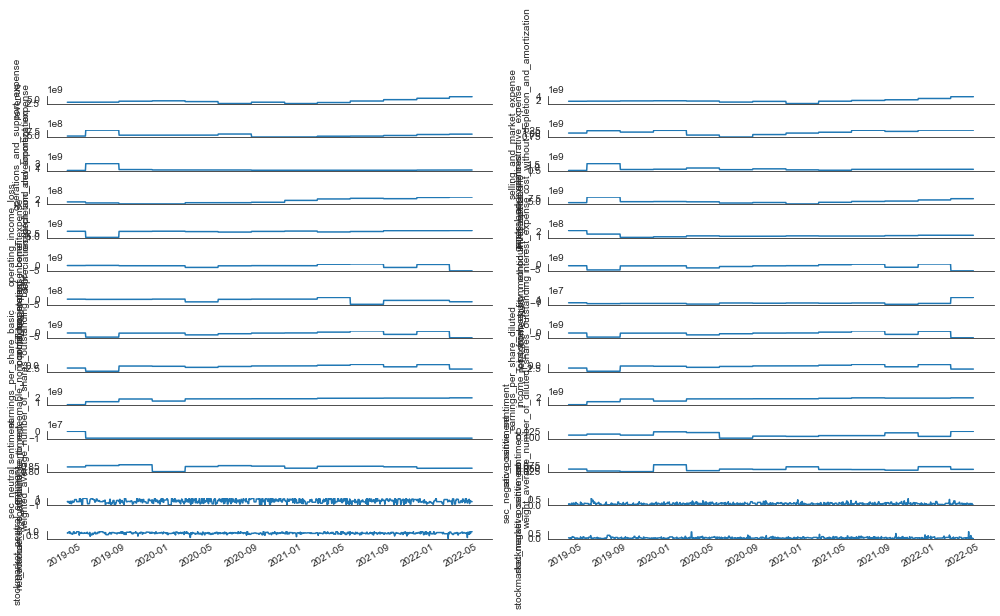

In [75]:
uber_plot = uber_df.copy()

ncols = 2
nrows = int(round(uber_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = uber_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [115]:
# Indexing Batches
train_df = uber_df.sort_values(by=['date']).copy()
train_df = train_df.set_index('date')

# List of considered Features
FEATURES = ['revenue',
            'cost_without_depletion_and_amortization',
            'operations_and_support_expense',
            'selling_and_market_expense',
            'research_and_development_expense',
            'general_and_administrative_expense',
            'depreciation_depletion_and_amortization',
            'costs_and_expenses',
            'operating_income_loss',
            'interest_expense',
            'nonoperating_income_expense',
            'incomeloss_from_continuining_operations',
            'income_tax_expense_benefit',
            'income_loss_from_equity_method_investments',
            'profit_loss',
            #'unnamed',
            'net_income_loss',
            'earnings_per_share_basic',
            'earnings_per_share_diluted',
            'weighted_average_number_of_shares_outstanding_basic',
            'weight_average_number_of_diluted_shares_outstanding',
            'net_income_loss_attributable_to_redeemable_noncontrolling_interest',
            #'sec_compound_sentiment',
            'sec_positive_sentiment',
            'sec_neutral sentiment',
            'sec_negative_sentiment',
            'stockmarket_compound_sentiment',
            'stockmarket_positive_sentiment',
            'stockmarket_neutral_sentiment',
            'stockmarket_negative_sentiment',
            'volume',
            'close']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['revenue', 'cost_without_depletion_and_amortization', 'operations_and_support_expense', 'selling_and_market_expense', 'research_and_development_expense', 'general_and_administrative_expense', 'depreciation_depletion_and_amortization', 'costs_and_expenses', 'operating_income_loss', 'interest_expense', 'nonoperating_income_expense', 'incomeloss_from_continuining_operations', 'income_tax_expense_benefit', 'income_loss_from_equity_method_investments', 'profit_loss', 'net_income_loss', 'earnings_per_share_basic', 'earnings_per_share_diluted', 'weighted_average_number_of_shares_outstanding_basic', 'weight_average_number_of_diluted_shares_outstanding', 'net_income_loss_attributable_to_redeemable_noncontrolling_interest', 'sec_positive_sentiment', 'sec_neutral sentiment', 'sec_negative_sentiment', 'stockmarket_compound_sentiment', 'stockmarket_positive_sentiment', 'stockmarket_neutral_sentiment', 'stockmarket_negative_sentiment', 'volume', 'close']


,revenue,cost_without_depletion_and_amortization,operations_and_support_expense,selling_and_market_expense,research_and_development_expense,general_and_administrative_expense,depreciation_depletion_and_amortization,costs_and_expenses,operating_income_loss,interest_expense,...,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close,Prediction
date,,,,,,,,,,,,,,,,,,,,,
2022-05-27,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,0.126,0.833,0.04,0.3098,0.051,0.859,0.090,29620958.0,23.67,23.67
2022-05-28,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,0.126,0.833,0.04,0.2944,0.131,0.803,0.066,29620958.0,23.67,23.67
2022-05-29,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,0.126,0.833,0.04,0.0000,0.000,1.000,0.000,29620958.0,23.67,23.67
2022-05-31,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,0.126,0.833,0.04,0.0000,0.000,1.000,0.000,33048952.0,23.20,23.20
2022-06-01,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,0.126,0.833,0.04,0.0000,0.000,1.000,0.000,26285752.0,22.94,22.94


In [116]:
# Scaling
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(1118, 30)


### Set a sliding window

In [117]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data_filtered.columns.get_loc("close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columns
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(845, 50, 30) (845,)
(223, 50, 30) (223,)
0.652605459057072
0.652605459057072


In [156]:
train_data

array([[0.1886344 , 0.334563  , 0.13827655, ..., 0.10019953, 1.        ,
        0.55314309],
       [0.1886344 , 0.334563  , 0.13827655, ..., 0.12345679, 1.        ,
        0.55314309],
       [0.1886344 , 0.334563  , 0.13827655, ..., 0.078314  , 1.        ,
        0.55314309],
       ...,
       [0.5659032 , 0.54937571, 0.22044088, ..., 0.01611797, 0.08756319,
        0.66687345],
       [0.5659032 , 0.54937571, 0.22044088, ..., 0.03360768, 0.07008195,
        0.66645988],
       [0.5659032 , 0.54937571, 0.22044088, ..., 0.03840878, 0.06540334,
        0.64474773]])

In [155]:
df = pd.DataFrame(x_train)

ValueError: Must pass 2-d input. shape=(845, 50, 30)

In [150]:
data_len = train_data.shape[0]

In [151]:
data_len

895

In [118]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

1500 50 30


In [127]:
# Training the model
epochs = 2
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/2
53/53 [==============================] - 230s 4s/step - loss: 0.0047 - val_loss: 0.0137
Epoch 2/2
53/53 [==============================] - 217s 4s/step - loss: 0.0042 - val_loss: 0.0076


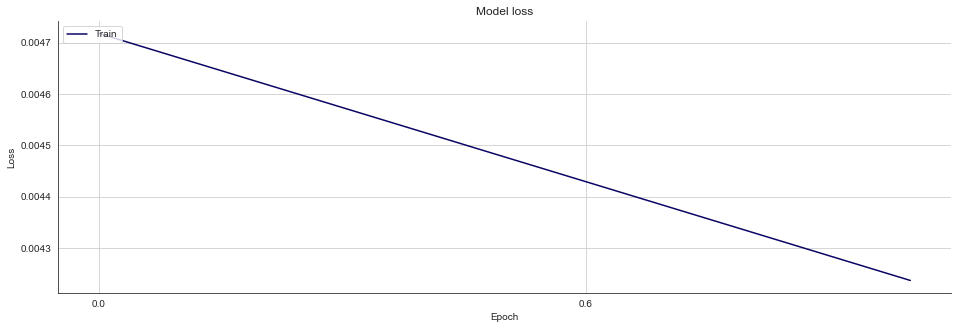

In [128]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [129]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

7/7 [==============================] - 5s 688ms/step
Median Absolute Error (MAE): 3.23
Mean Absolute Percentage Error (MAPE): 10.54 %
Median Absolute Percentage Error (MDAPE): 6.02 %


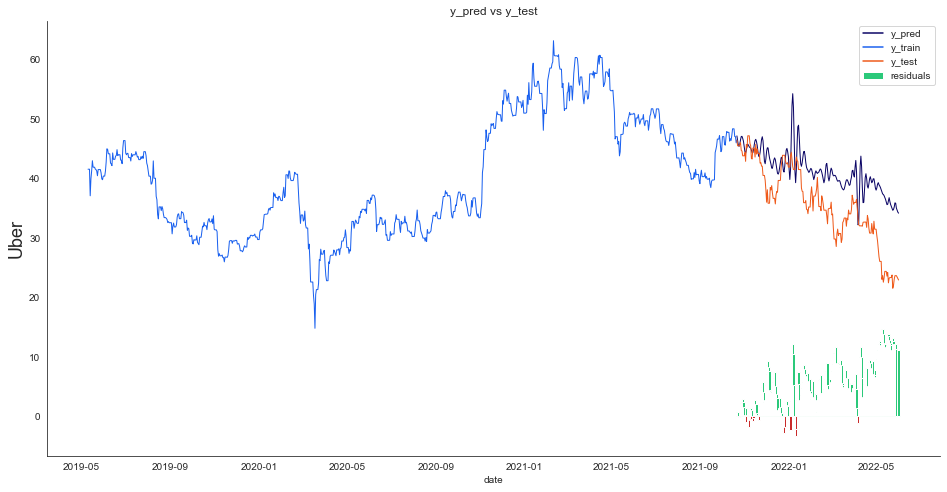

In [126]:
# The date from which on the date is displayed
display_start_date = "2019-01-01" 
stockname = "Uber"

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['close'][:train_data_len + 1]).rename(columns={'close': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['close'][train_data_len:]).rename(columns={'close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel(stockname, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

In [147]:
from libs.lstm_lib import *

In [148]:
prepare_lstm(uber_df)

TypeError: prepare_lstm() missing 1 required positional argument: 'sequence_length'